# Project's description:
Zyfra is a company that specializes in developing artificial intelligence and IloT-based solutions and robotic mining equipment for heavy industry. One of Zyfra's clients is a gold mining/processing company, who hired Zyfra to determine whether machine learning can identify ways to optimize the production of gold and eliminate unprofitable parameters.

# Project's goal:
Prepare a prototype of a machine learning model, based on extraction and purification data, that predicts the amount of gold recovered from gold ore.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Load, overview and prepare the data</h2>
</div>

updating libraries:

In [1]:
!pip install pandas --upgrade
!pip install seaborn --upgrade    
!pip install -U scikit-learn --upgrade 

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pandas in /home/jovyan/.local/lib/python3.7/site-packages (1.3.4)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in /home/jovyan/.local/lib/python3.7/site-packages (1.0.1)


Import libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from catboost import CatBoostRegressor
#ignoring warning
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


make a try-except block in order to avoid file path error when working both locally and remotely.

In [3]:
try:
    gold_train = pd.read_csv('gold_recovery_train.csv')
    gold_test = pd.read_csv('gold_recovery_test.csv')
    gold_full = pd.read_csv('gold_recovery_full.csv')
    
except:   
    gold_train = pd.read_csv('/datasets/gold_recovery_train.csv')
    gold_test = pd.read_csv('/datasets/gold_recovery_test.csv')
    gold_full = pd.read_csv('/datasets/gold_recovery_full.csv')

### Overview the data:

##### Train file:

Check the table's first 5 rows to see the general information.

In [4]:
gold_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Check the table's general structure:

In [5]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


##### Test file:

Check the table's first 5 rows to see the general information.

In [6]:
gold_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Check the table's general information:

In [7]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

##### Full file:

Check the table's first 5 rows to see the general information:

In [8]:
gold_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Check the table's general information:

In [9]:
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


#### Conclusion:

- The data in all files consists of information about metal concentrations at different stages.

###  Check that recovery is calculated correctly (rougher using train set). Find the MAE between your calculations and the feature values. 

calculating using the provided formula:

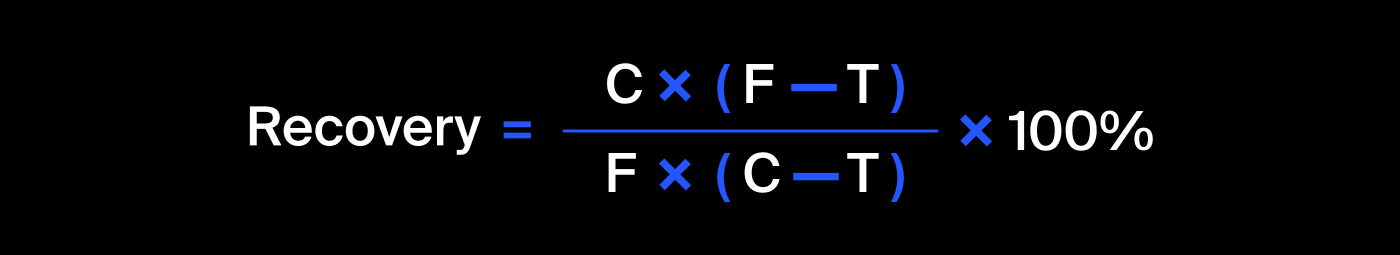

In [10]:
C = gold_train["rougher.output.concentrate_au"]
F = gold_train["rougher.input.feed_au"]
T = gold_train["rougher.output.tail_au"]

gold_train["recovery"] = (C * (F - T)) / (F * (C - T)) * 100

Checking the MAE between our calculation and the feature values:

In [11]:
mae = (gold_train["recovery"] - gold_train["rougher.output.recovery"]).abs().mean()
print("MAE:", mae)

MAE: 9.303415616264301e-15


#### Conclusion:

- The mean absolute error is 9.3e-15 which is  a very small number ,hence we know that the feature values in the data are very accurate.

### Analyze the features not available in the test set. 

displaying the columns that exists in the full set but doesnt exist in the test set

In [12]:
gold_train.columns.difference(gold_test.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'recovery', 'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
  

#### Description & Conclusion:
- The types of the features that arent available in the test set are output and calculation.
- The parameters are output values at different stages for various metals. 
- final.output.recovery and rougher.output.recovery are our target variables and they will be added to the test set from the full dataset.
- The rest of the output values are not necessary for the machine learning model training and testing.

### Data preprocessing

Checking for duplicates:

In [13]:
gold_train.duplicated().sum()

0

In [14]:
gold_test.duplicated().sum()

0

adding target values from gold_full to gold_test as we identified before they are missing, and dropping features that doesnt exist in both sets:

In [15]:
#Merge target values from gold_full into gold_test
gold_test = pd.merge(gold_test, gold_full[['date', 'final.output.recovery', 'rougher.output.recovery']],
                      on='date',how='left'
                     )
#Drop features not in gold test from gold train
gold_train = gold_train.drop(columns=[x for x in gold_train if x not in gold_test], axis=1)

 #Drop features in gold_test not in gold train
gold_test = gold_test.drop(columns=[x for x in gold_test if x not in gold_train], axis=1)

Checking for rows with missing values:

In [16]:
abs_value_t = gold_train.isna().any(axis=1).sum()
abs_value_tst = gold_test.isna().any(axis=1).sum() 
pct_t = round(abs_value_t / len(gold_train) * 100,2)
pct_tst = round(abs_value_tst / len(gold_test) * 100,2)
print('Rows with missing values in train set: {}, {}% of total\n\nRows with missing values in test set: {}, {}% of total'.format(abs_value_t, 
                                                                                                            pct_t,
                                                                                                           abs_value_tst,
                                                                                                           pct_tst))

Rows with missing values in train set: 4181, 24.8% of total

Rows with missing values in test set: 627, 10.71% of total


##### Conclusion:
We have too many rows with missing values, hence we can't delete them.
- The project provider told us that parameters that are next to each other in terms of time(date) are often similar.
- Knowing this, we will use KNNImputer to fill our missing values.
- Before using the KNNImputer, we will scale the values as KNN is distance based algorithm that is affected by the scale of the variables.

#### Scale the data:

In [17]:
scaler = MinMaxScaler()

#lists for columns to scale and not to scale.

scale_columns = [x for x in gold_train.columns if x not in ['date', 'rougher output.recovery', 'final.output.recovery']]
non_scale_columns = ['date', 'rougher.output.recovery', 'final.output.recovery']
                 
#scale the data for training and testing datasets.

gold_train_scaled = pd.DataFrame(scaler.fit_transform(gold_train[scale_columns].copy()), columns = scale_columns)
gold_test_scaled = pd.DataFrame(scaler.transform(gold_test[scale_columns].copy()), columns = scale_columns)

#### Impute missing values for features and drop remaining rows with missing values:

In [18]:
#instance of KNNImputer class.
imputer = KNNImputer()

#scale the  values in both DataFrames and add the 'date' column back to each.

gold_train_scaled = pd.concat([gold_train[non_scale_columns]] + \
                              [pd.DataFrame(imputer.fit_transform(gold_train_scaled), \
                               columns=gold_train_scaled.columns)], axis = 1)

gold_test_scaled = pd.concat([gold_test[non_scale_columns]] + \
                             [pd.DataFrame(imputer.transform(gold_test_scaled), \
                              columns=gold_test_scaled.columns)], axis = 1)

In [19]:
missing_targets_train = round(gold_train_scaled[['final.output.recovery','rougher.output.recovery']].isnull().any(axis=1).sum() \
                        / len(gold_train_scaled) * 100,2)
missing_targets_test = round(gold_test_scaled[['final.output.recovery','rougher.output.recovery']].isnull().any(axis=1).sum() \
                       / len(gold_test_scaled) * 100,2)
print('% of rows with 1 or both targets missing in train set: {}'.format(missing_targets_train))
print('% of rows with 1 or both targets missing in test set: {}'.format(missing_targets_test))

% of rows with 1 or both targets missing in train set: 16.08
% of rows with 1 or both targets missing in test set: 9.67


Drop the remaining rows with missings targets:

In [20]:
gold_train_scaled = gold_train_scaled.dropna().reset_index(drop=True)
gold_test_scaled = gold_test_scaled.dropna().reset_index(drop=True)

### Conclusion:

- There are no duplicate rows in the data.
- We have scaled the data using MinMax scaler.
- We have identified missing values in both test and train set and have filled them using KNNImputer.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Analyze the data</h2>
</div>

#### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [21]:
concentrations_au = gold_full[["rougher.input.feed_au", "rougher.output.concentrate_au", "primary_cleaner.output.concentrate_au", "final.output.concentrate_au"]]
concentrations_ag = gold_full[["rougher.input.feed_ag", "rougher.output.concentrate_ag", "primary_cleaner.output.concentrate_ag", "final.output.concentrate_ag"]]
concentrations_pb = gold_full[["rougher.input.feed_pb", "rougher.output.concentrate_pb", "primary_cleaner.output.concentrate_pb", "final.output.concentrate_pb"]]

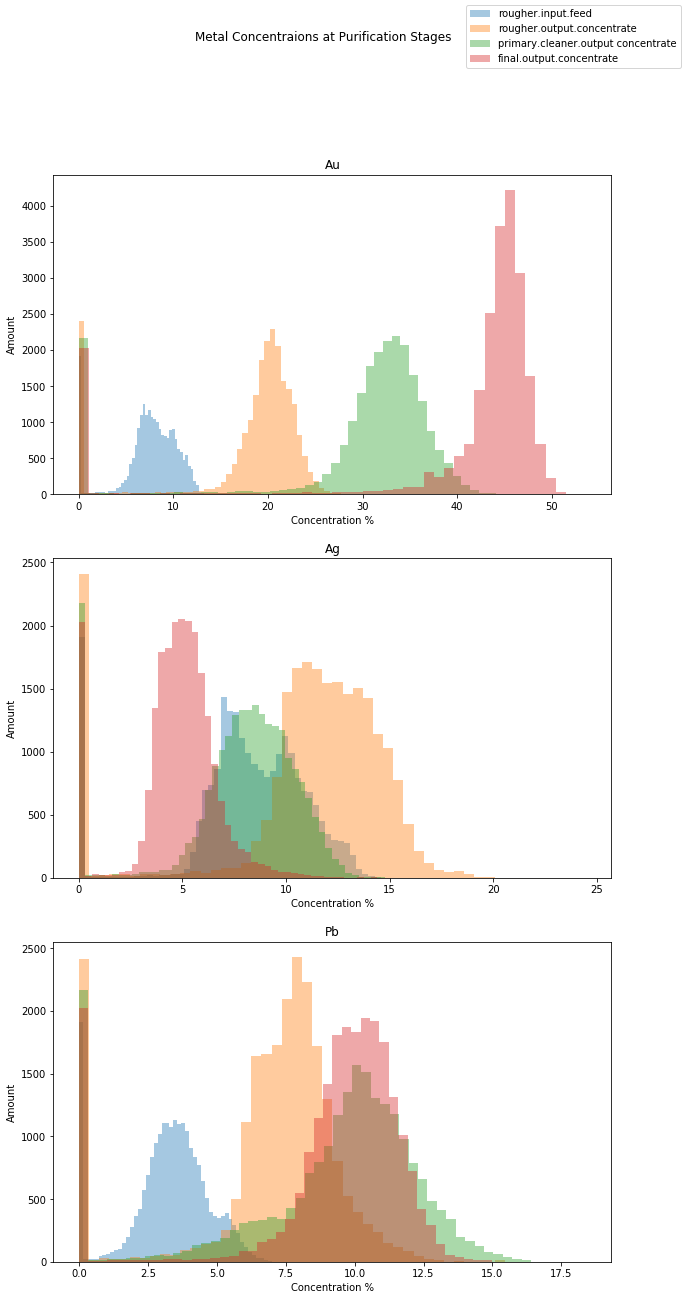

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(10, 20))
for column in list(concentrations_au):
    sns.distplot(concentrations_au[column], ax=axes[0], kde=False)
axes[0].set(title="Au", xlabel="Concentration %", ylabel="Amount")
for column in list(concentrations_ag):
    sns.distplot(concentrations_ag[column], ax=axes[1], kde=False)
axes[1].set(title="Ag", xlabel="Concentration %", ylabel="Amount")
for column in list(concentrations_pb):
    sns.distplot(concentrations_pb[column], ax=axes[2], kde=False)
axes[2].set(title="Pb", xlabel="Concentration %", ylabel="Amount")
fig.suptitle("Metal Concentraions at Purification Stages")
fig.legend(["rougher.input.feed", "rougher.output.concentrate", "primary.cleaner.output concentrate", "final.output.concentrate",])
fig.show()


#### Description & Conclusion:

This graph shows the Au, Ag, and Pb metal concentrations at the purification stage.

The concentration of Au increases unifomrly throughout the purification stage. The concentraion of Ag increases and decreases slightly throughout the stage resulting in a net decrease. The concnetration of Pb increases slightly throughout the stage resulting in a net increase similar to the primary cleaner output concentrate.

- we also notice outliers at 0% concentration, which will be removed.

#### Compare the feed particle size distributions in the training set and in the test set.

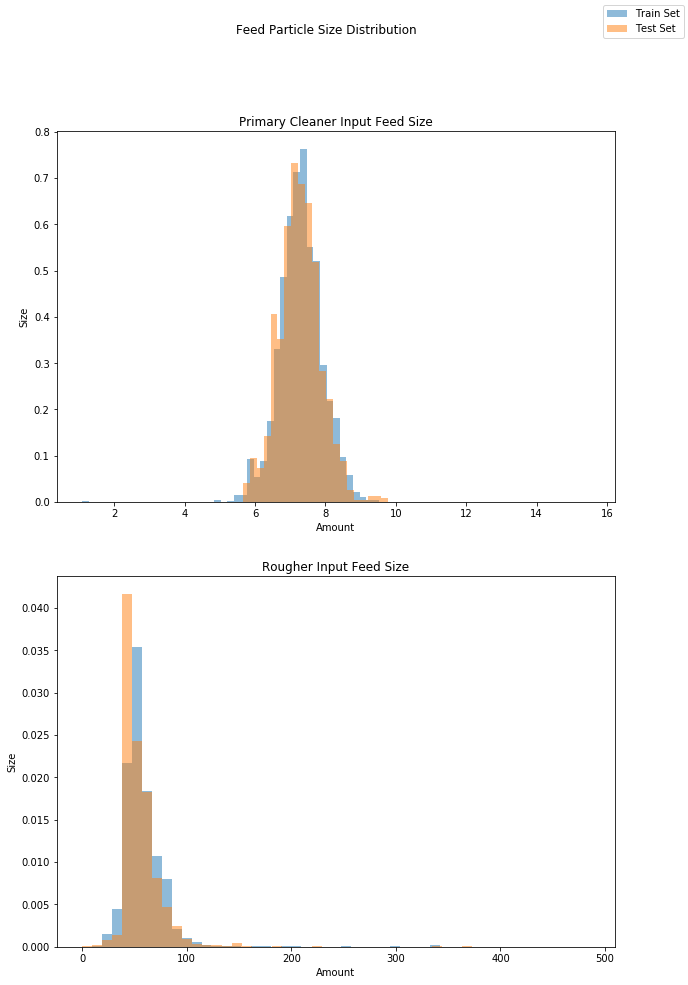

In [23]:
fig, axes = plt.subplots(2,1, figsize=(10, 15))
axes[0].hist(gold_train["primary_cleaner.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[0].hist(gold_test["primary_cleaner.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[0].set(title="Primary Cleaner Input Feed Size", xlabel="Amount", ylabel="Size")
axes[1].hist(gold_train["rougher.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[1].hist(gold_test["rougher.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[1].set(title="Rougher Input Feed Size", xlabel="Amount", ylabel="Size")
fig.suptitle("Feed Particle Size Distribution")
fig.legend(["Train Set", "Test Set"])
fig.show()

#### Description  & conclusion:
- The particle size distribution shows that the particles sizes do not vary siginificantly in the train and test set. Therefore the model evaluation may be correct.

#### Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.¶

In [25]:
gold_full['raw_feed'] = gold_full["rougher.input.feed_au"] + gold_full["rougher.input.feed_ag"] + gold_full["rougher.input.feed_pb"] + gold_full["rougher.input.feed_sol"]

gold_full['rougher_concentrations'] = gold_full["rougher.output.concentrate_au"] + gold_full["rougher.output.concentrate_ag"] + gold_full["rougher.output.concentrate_pb"] + gold_full["rougher.output.concentrate_sol"]

gold_full['final_concentrations'] = gold_full["final.output.concentrate_au"] + gold_full["final.output.concentrate_ag"] + gold_full["final.output.concentrate_pb"] + gold_full["final.output.concentrate_sol"]


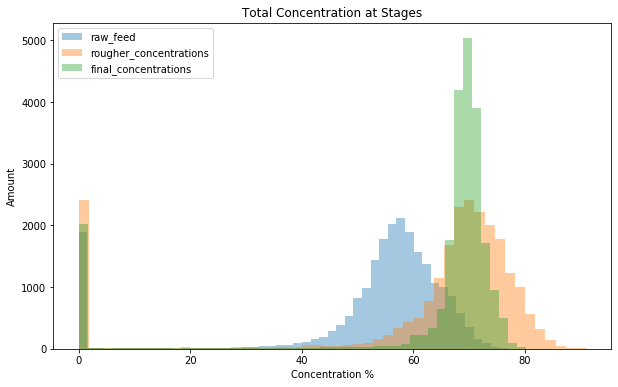

In [27]:
fig = plt.figure(figsize=(10, 6))
cols = ['raw_feed','rougher_concentrations','final_concentrations']
for column in cols:
    sns.distplot(gold_full[column], kde=False)
plt.legend(cols)
plt.title("Total Concentration at Stages")
plt.xlabel("Concentration %")
plt.ylabel("Amount")
fig.show()

#### Description & Conclusion:
- This graph shows the total concentration through all stages.
- The concentration distributions at various stages all show abnormal values at 0%. 
Therefore it is worth removing these values from both samples (< 10%) to improve our model's accuracy.

#### Remove outliers:

In [28]:
gold_full_no_outliers = gold_full.loc[(gold_full[['rougher.input.feed_au', 'rougher.input.feed_pb', \
                                                'rougher.input.feed_ag']].sum(axis=1) > 10)
                                  & (gold_full[['rougher.output.concentrate_au', 'rougher.output.concentrate_pb', \
                                                'rougher.output.concentrate_ag']].sum(axis=1) > 10) \
                                  & (gold_full[['final.output.concentrate_au', 'final.output.concentrate_pb', \
                                                'final.output.concentrate_ag']].sum(axis=1) > 10)]

Removing outliers from scaled testing and training datasets based on whether date is in gold_full_no_outliers.

In [29]:
gold_train_scaled = gold_train_scaled.loc[gold_train_scaled['date'].isin(gold_full_no_outliers['date'])].reset_index(drop=True)
gold_test_scaled = gold_test_scaled.loc[gold_test_scaled['date'].isin(gold_full_no_outliers['date'])].reset_index(drop=True)

Checking the new distribution:

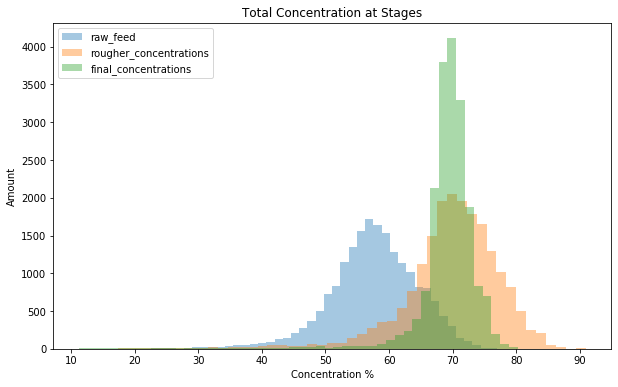

In [30]:
fig = plt.figure(figsize=(10, 6))
cols = ['raw_feed','rougher_concentrations','final_concentrations']
for column in cols:
    sns.distplot(gold_full_no_outliers[column], kde=False)
plt.legend(cols)
plt.title("Total Concentration at Stages")
plt.xlabel("Concentration %")
plt.ylabel("Amount")
fig.show()

#### Description & conclusion:
- we see that our removal worked, and the lowest value being 10%
- we have removed the outliers from the train and test set.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Build the model</h2>
</div>

#### Write a function to calculate the final sMAPE value

Using the provided formulas to calculate sMAPE:
    
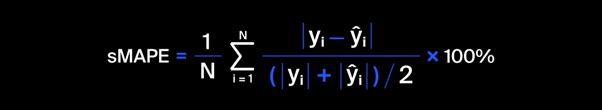
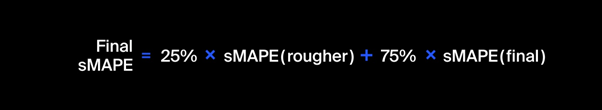

#### Functions to calculate sMAPE and final sMAPE:

In [31]:
def smape2(y_true, y_pred):
    smape = np.mean(abs(y_pred - y_true) / ((abs(y_true) + abs(y_pred)) / 2)) * 100
    return smape

In [32]:
def f_smape(y_true, y_pred):
    predicted_rough, predicted_final = y_pred[:, 0], y_pred[:, 1]
    true_rough, true_final = y_true[:, 0], y_true[:, 1]
    f_smape = (.25 * (smape2(true_rough, predicted_rough))) + (.75 * (smape2(true_final, predicted_final)))
    return f_smape

Creating the features and targets for train and test:

In [33]:
targets = ['rougher.output.recovery', 'final.output.recovery']
features = [x for x in gold_train_scaled if x not in targets and x != 'date']

#Split training and testing datasets by features and targets.
y_train, y_test = gold_train_scaled[targets].values, gold_test_scaled[targets].values
X_train, X_test = gold_train_scaled[features].values, gold_test_scaled[features].values

In [34]:
#Create scorer for GridSearchCV.

smape = make_scorer(f_smape, greater_is_better=False)

#function to train and fit models using GridSearchCV

def train_fit_score(model, params, name):

    model = GridSearchCV(model, param_grid=params, cv=5, scoring=smape, verbose=0, refit=True)
    model.fit(X_train, y_train)
    return pd.DataFrame([[name, abs(model.best_score_), model.best_params_]], columns=['Estimator', 'Best Score','Best Params'])

In [35]:
#Decision Tree
DecisionTree = train_fit_score(DecisionTreeRegressor(random_state=12345), \
                      {'max_depth': range(5, 20, 5), \
                       'min_impurity_decrease' : np.arange(.01, .20, .02), \
                       'min_samples_split' : range(2, 10, 2)}, 'Decision Tree')

In [36]:
#Linear regressor
LinearRegressor = train_fit_score(LinearRegression(), {}, 'Linear Regressor')

In [37]:
#Lasso
LassoRegressor = train_fit_score(Lasso(random_state=12345), \
                         {'alpha' : np.arange(.01, 1, .05)}, 'Lasso Regressor')

In [38]:
#KNeighbors Regressor
KNNeighbors = train_fit_score(KNeighborsRegressor(),
                            {'n_neighbors' : range(2, 10, 1),
                             'weights' : ['uniform', 'distance']}, 'KNeighbors Regressor')

In [39]:
#RandomForest Regressor
RandomForest = train_fit_score(RandomForestRegressor(random_state=12345),
                             {'n_estimators' : range(10, 85, 25),
                              'max_depth' : range(5, 45, 10),
                              'min_impurity_decrease' : np.arange(.05, .25, .1)}, 'Random Forest')

Display best scores:

In [40]:
scores = pd.concat([DecisionTree, LinearRegressor, LassoRegressor, KNNeighbors, RandomForest]).set_index('Estimator')
scores['Best Score'] = scores['Best Score'].round(2)
display(scores.drop('Best Params', axis=1))

,Best Score
Estimator,
Decision Tree,7.11
Linear Regressor,7.12
Lasso Regressor,7.32
KNeighbors Regressor,7.17
Random Forest,6.35


#### Description & Conclusion:
We trained 5 different regression models and obtained the sMAPE scores using the predictions of each model. We
used GridSearchCV to iterate through a series of hyperparameters for each model, we also specified that GridSearchCV use the sMAPE function we created for scoring and return the score for the model with the lowest average sMAPE score. Based on our results, it appears that the Linear Regressor performs the best, with approximately 7.12.

#### Test the Best Model on Testing Dataset:

In [51]:
best_model = RandomForestRegressor(**scores['Best Params'][4]).fit(X_train, y_train)
rf_smape = round(f_smape(y_test, best_model.predict(X_test)), 2)
print(f'sMAPE score for best Random Forest model on test datasets: {rf_smape}')

sMAPE score for best Linear Regressor model on test datasets: 4.48


#### Conclusion:

As it turns out, the sMAPE score for the testing datasets is better than the score for the training datasets. Our score of approximately 4.47 tells us that the model's forecast is off by an average of around 4.48 percent. Whereas this appears good, we cannot determine whether the value is indeed good without checking it against the sMAPE score of a naive forecasting model. As such, in the next section we will build a dummy regressor and check our SMAPE score against the score for a sanity check model.

#### Check the score against sanity check model:

In [52]:
smape_sanity = f_smape(y_test, np.tile(np.mean(y_train, axis=0), (len(y_test), 1)))

print(f'sMAPE score for sanity check model: {round(smape_sanity, 2)}')

sMAPE score for sanity check model: 5.13


### Conclusion:

To summerize:

- We first preprocessed the data; this involved checking for duplicates, scaling the data, filling the NaNS, and adding target values to the testing dataset. 

- We analyzed the data, examining the concentration of metals at various stages, visualizing the total concentration of all metals.

- We built functions to calculate the final sMAPE score from predictions and target values, and we trained various regression estimators. 

- We selected the estimator which provided the lowest sMAPE score and obtained the score for the testing datasets using the identified optimal parameters. (Random Forest regressor)

- Finally, we checked out score against the score provided by a sanity ‘model’.

Whereas the sMAPE score for out best model appeared quite good at approximately 4.48 percent, we needed to test this model against a sanity ‘model’ to get an accurate idea of how our model performs. As it turns out, our sanity ‘models’ sMAPE score was 5.13 percent.

We recommend to use RandomForest Regressor with the resulted parameters in order to have an improvment of - 
(5.13-4.48)/5.13 * 100% = 12.7%.